In [1]:
import hydra
import numpy as np
from omegaconf import OmegaConf
from pymongo import MongoClient
import os
from pathlib import Path

from util import load_db, plot_one_col

In [2]:
coreset_type = 'simplex'

metrics = [
    # 'final_mmd', 
    # 'final_ed',
    'mse',
]

method_record_dict = {
    'Standard': {
        'debias.alg': 'noop',
        'compress.alg': 'std',
        'compress.coreset_type': coreset_type,
        'out_size': 'n**0.5',
    },
    'Stein Thinning': {
        'debias.alg': 'noop',
        'compress.alg': 'st',
        'compress.coreset_type': coreset_type,
        'out_size': 'n**0.5',
    },
}
if coreset_type == 'integer':
    method_record_dict.update({
        'GBC-EQ': {
            'debias.alg': 'st',
            'compress.alg': 'kt',
            'out_size': 'n**0.5',
        },
        'LBC-EQ(r=n**0.4)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'cpp',
            'out_size': 'n**0.4',
        },
        'LBC-EQ(r=n**0.5)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'cpp',
            'out_size': 'n**0.5',
        }
    })
elif coreset_type == 'simplex':
    method_record_dict.update({
        'GBC-CVX(r=n**0.4)': {
            'debias.alg': 'st',
            'compress.alg': 'recomb',
            'out_size': 'n**0.4',
        },
        'GBC-CVX(r=n**0.5)': {
            'debias.alg': 'st',
            'compress.alg': 'recomb',
            'out_size': 'n**0.5',
        },
        'LBC-CVX(r=n**0.4)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'recomb',
            'out_size': 'n**0.4',
        },
        'LBC-CVX(r=n**0.5)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'recomb',
            'out_size': 'n**0.5',
        }
    })
else:
    assert(coreset_type == 'cp')
    method_record_dict.update({
        'GBC-CP(r=n**0.4)': {
            'debias.alg': 'st',
            'compress.alg': 'chol',
            'out_size': 'n**0.4',
        },
        'GBC-CP(r=n**0.5)': {
            'debias.alg': 'st',
            'compress.alg': 'chol',
            'out_size': 'n**0.5',
        },
        'LBC-CP(r=n**0.4)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'chol',
            'out_size': 'n**0.4',
        },
        'LBC-CP(r=n**0.5)': {
            'debias.alg': 'lr',
            'debias.rank': 'm',
            'compress.alg': 'chol',
            'out_size': 'n**0.5',
        }
    })

ns = [1024, 4096, 16384, 65536, 262144, 1048576]
seeds = [1, 2, 3, 4, 5]

loaded_result = load_db(
    'approx', 
    method_record_dict=method_record_dict,
    ns=ns, n_key='problem/post.num_point',
    seeds=seeds, seed_key='problem/mcmc.seed',
    metrics=metrics)

Found 0 matches for record = {'_stage': 'final', 'problem/post.num_point': 1048576, 'problem/mcmc.seed': 1, 'debias.alg': 'st', 'compress.alg': 'recomb', 'compress.out_size': 257}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem/post.num_point': 1048576, 'problem/mcmc.seed': 2, 'debias.alg': 'st', 'compress.alg': 'recomb', 'compress.out_size': 257}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem/post.num_point': 1048576, 'problem/mcmc.seed': 3, 'debias.alg': 'st', 'compress.alg': 'recomb', 'compress.out_size': 257}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem/post.num_point': 1048576, 'problem/mcmc.seed': 4, 'debias.alg': 'st', 'compress.alg': 'recomb', 'compress.out_size': 257}!
Record not found!
Found 0 matches for record = {'_stage': 'final', 'problem/post.num_point': 1048576, 'problem/mcmc.seed': 5, 'debias.alg': 'st', 'compress.alg': 'recomb', 'compress.out_size': 257}!
Record not found!
Found

xlim for mse: (-17.6, 1073.6)
ylim for mse: (0.00010175005963024283, 0.0256041013877114)


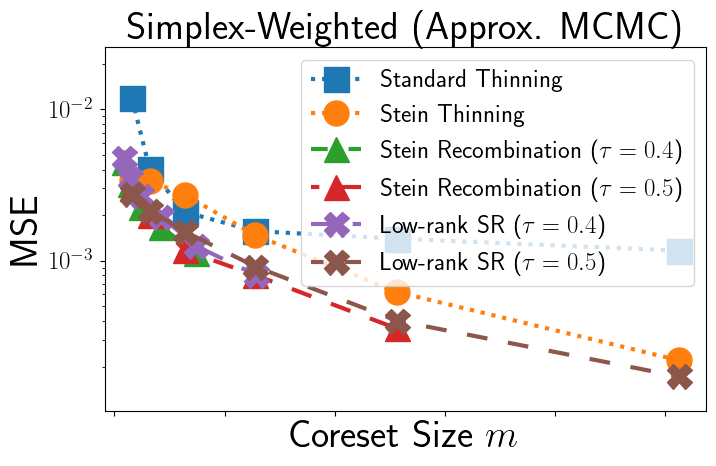

In [3]:
coreset_type_to_title = {
    'integer': 'Equal-Weighted (Approx. MCMC)',
    'simplex': 'Simplex-Weighted (Approx. MCMC)',
    'cp': 'Constant-Preserving (Approx. MCMC)'
}

metric_y_lim = {
    'final_mmd': (0.08793047841771935, 2),
    'final_ed': (3.2266240935448702, 3.3222368794229693),
    'mse': (0.00010175005963024283, 0.0256041013877114),
}
x_lim = (-17.6, 1073.6)

# metric_y_lim = None
# x_lim = None

plot_one_col(loaded_result, metrics, coreset_type_to_title[coreset_type],
            save_path=f'approx_{coreset_type}.pdf', metric_y_lim=metric_y_lim, x_lim=x_lim)